# LeNet-5 (1998, Yan LeCunn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation

from tensorflow.keras.datasets import mnist
np.random.seed(101)

### train, test split

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


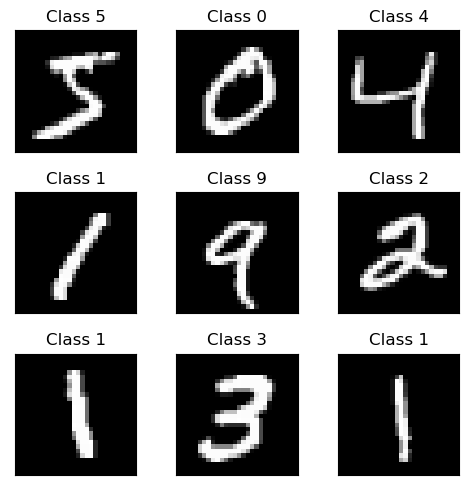

In [3]:
plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

plt.show()

### scaling 
- 0 `~` 1 사이로 pixel 값을 scale

In [4]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

### Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가

In [5]:
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
X_test_scaled = np.expand_dims(X_test_scaled, axis=3)

In [6]:
X_train_scaled.shape, X_test_scaled.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### label 을 one-hot-encoding

In [7]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

## tf.data 를 이용한 shuffling and batch 구성

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot))\
        .shuffle(10000).batch(128)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(128)

## LeNet 구성

<img src="https://d2l.ai/_images/lenet.svg" width="800" />

In [9]:
model = tf.keras.Sequential()

model.add(Conv2D(6, kernel_size=5, padding="same", input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, kernel_size=5, padding="valid"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(120))
model.add(Activation ('relu'))

model.add(Dense(84))
model.add(Activation ('relu'))

model.add(Dense(10))
model.add(Activation ('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 activation (Activation)     (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 activation_1 (Activation)   (None, 10, 10, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                    

In [10]:
model.compile(loss="categorical_crossentropy", 
              optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=5, 
                    validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.3149 - accuracy: 0.9035 - val_loss: 0.0907 - val_accuracy: 0.9692
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0845 - accuracy: 0.9738 - val_loss: 0.0664 - val_accuracy: 0.9776
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0603 - accuracy: 0.9812 - val_loss: 0.0407 - val_accuracy: 0.9865
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0385 - val_accuracy: 0.9871
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0328 - val_accuracy: 0.9895


In [12]:
score = model.evaluate(test_ds, verbose=0)

In [13]:
print("Test Score ", score[0])
print("Test Accuracy ", score[1])

Test Score  0.03281017020344734
Test Accuracy  0.9894999861717224


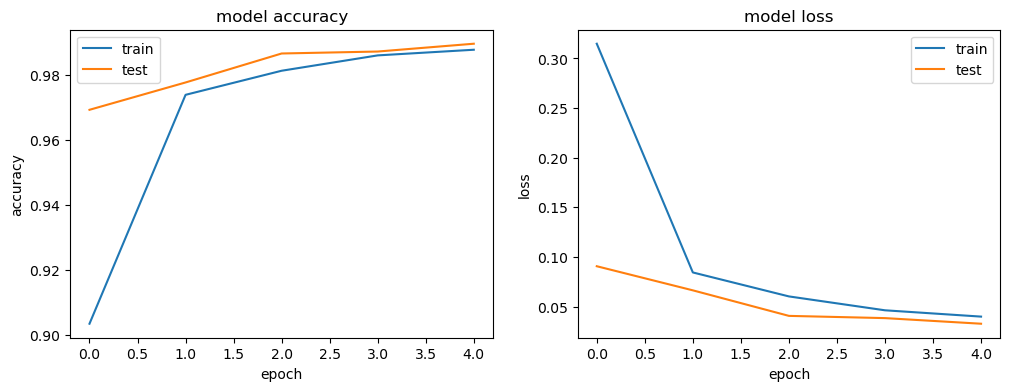

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [15]:
y_pred = model.predict(X_test_scaled).argmax(axis=1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

[[ 975    0    1    0    0    0    0    0    2    2]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   2    2 1017    1    1    0    0    4    5    0]
 [   0    0    0 1006    0    2    0    0    1    1]
 [   1    0    1    0  972    0    2    2    0    4]
 [   2    1    0    8    0  875    1    0    3    2]
 [   6    2    0    0    1    3  943    0    3    0]
 [   0    4    2    0    0    0    0 1014    1    7]
 [   1    0    1    3    1    0    0    2  961    5]
 [   0    3    0    2    4    0    0    2    0  998]]


Test Accuracy : 0.9895


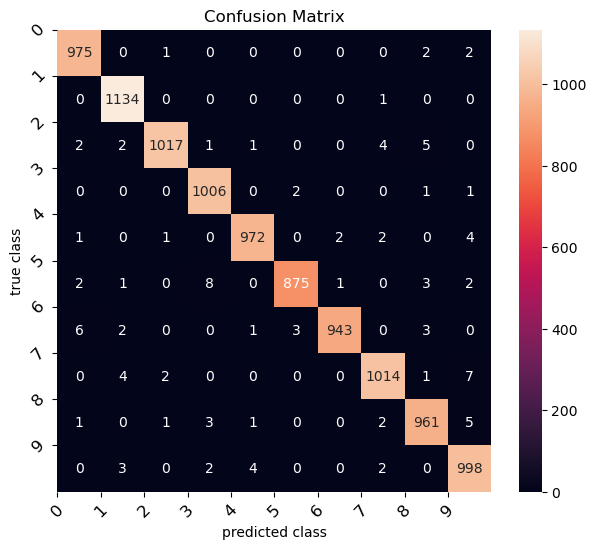

In [18]:
import seaborn as sns

plt.figure(figsize=(7,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

plt.xticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.yticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.xlabel("predicted class")
plt.ylabel("true class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_test, y_pred))

# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

Label	Class  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation

np.random.seed(102)

In [20]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

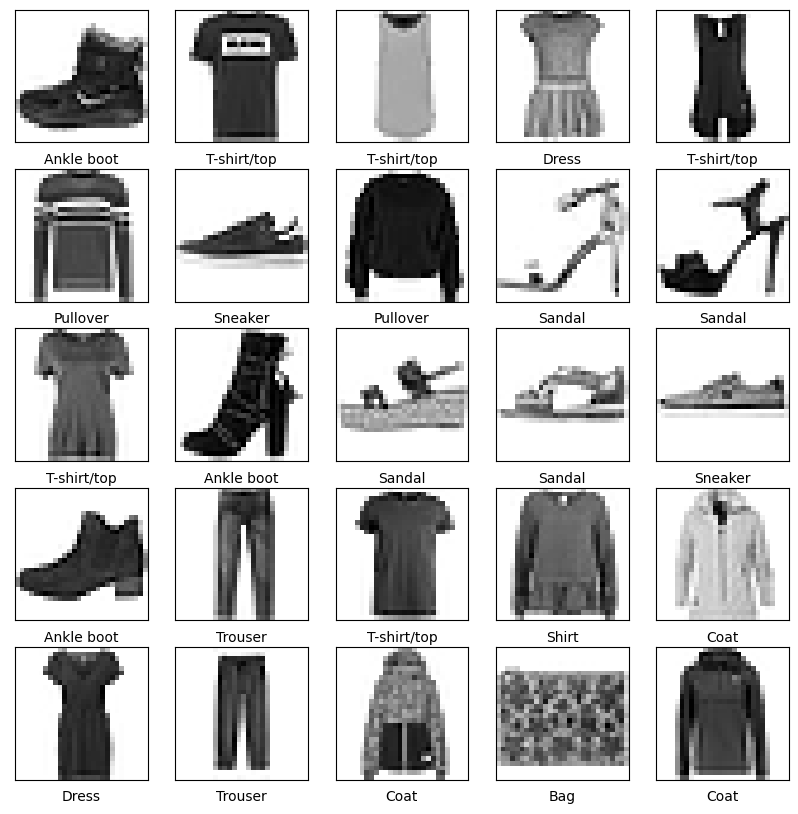

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])

In [23]:
X_train = train_images / 255.0
X_test  = test_images / 255.0

In [24]:
# Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가

In [25]:
# label 을 one-hot-encoding

In [26]:
# tf.data 를 이용한 shuffling and batch 구성

In [27]:
# LeNet model 구성

In [28]:
# model compile and predict

In [29]:
# train history 시각화

In [30]:
# confusion matrix 시각화